# Inaugural Project

Using $p_h = h$ and combining the three constraints (2), (3) and (4) in order to get one constraint: 
$$m = rh + \tau^gh\epsilon + \tau^p max[h\epsilon - \bar{p} , 0] + c$$
$$c = m - rh - \tau^gh\epsilon - \tau^p max[h\epsilon - \bar{p} , 0] $$

Imports and set magics:

In [51]:
import numpy as np
import math
from statistics import mean

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# local modules
import inauguralproject
from scipy import optimize 
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We define four functions. One that computes the utility of the household.
A function that computes the amount of consumption.
An objective function that is to be minimized.
A solver function that maximizes the utility with respect to the constraint

In [52]:
#Defining values and parameters
m= 0.5
parameters = {'phi': 0.3, 'epsilon': 0.5, 'r': 0.03, 'tau_g':0.012, 'tau_p': 0.004, 'p_bar': 3}


def u_func(c, h, parameters):
    """
    A function that computes the utillity of the household
    Args:
        c (float): Amount of consumption 
        h (float): Amount of housing
        parameters (dict): Parameters of the model
        
    Returns a float
    """
    return c**(1-parameters['phi'])*(h**parameters['phi'])


def c_func(h, m, parameters):
    """
    A function that computes the consumption amount
    Args:
       m (float): cash on hand
       h (float): Amount of housing
       parameters (dict): Parameters of the model
    
    Returns: 
    (float): Amount of consumption
    """
    return m - parameters['r']*h - parameters['tau_g'] * h * parameters['epsilon'] - parameters['tau_p'] * max(h*parameters['epsilon']-parameters['p_bar'],0)


def objective_func(h, m, parameters):
    """
    Objective function to be minimized
    Args:
        h (float): Amount of housing
        m (float): cash on hand
        parameters (dict): Parameters of the model
        
    Returns:
        (float): Objective function
        
    """
    c = c_func(h, m, parameters)
    
    return -u_func(c, h, parameters)


def solver(m, parameters):
    """
    Solver function
    Args:
        m (float): cash on hand
        parameters (dict): Parameters of the model
    
    Return:
    (array): Optimal amount of h, conditional on constraint
    
    """

    return optimize.minimize_scalar(objective_func, args=(m, parameters), 
                                   bounds= None)


h_best = solver(m, parameters).x
c_best = c_func(h_best, m, parameters)
u_best = u_func(c_best, h_best, parameters)

print(f'The optimal amount of housing is: h = {h_best:.5f}')
print(f'The optimal amount of consumption is: c = {c_best:.5f}')
print(f'The maximized utility is: u  = {u_best:.5f}')


The optimal amount of housing is: h = 4.16667
The optimal amount of consumption is: c = 0.35000
The maximized utility is: u  = 0.73584


# Question 2

Plotting $c^*$ and $h^*$ as a function of m

We run a for loop where we solve the model for different levels of m.
For each level of m, we store the optimal values of $c^*$ and $h^*$ in lists.
At last we plot the values against m.


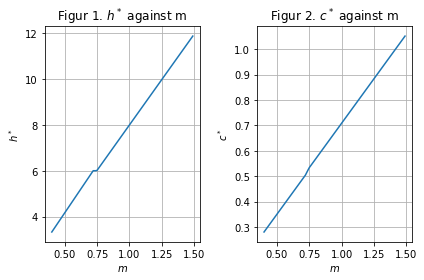

In [53]:
# Creating empty lists
h_list=[]
c_list=[]
m_list=[]

# For loop where we solve the model with different levels of m
for m in np.arange(0.4, 1.5, 0.01):
    h_best = solver(m, parameters).x
    c_best = c_func(h_best, m, parameters)
    h_list.append(h_best)    # Storing optimal values in lists..
    c_list.append(c_best)
    m_list.append(m)

# Figure of h and c as a function of m

# c. left plot
fig = plt.figure()
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(m_list,h_list)

ax_left.set_title('Figur 1. $h^*$ against m')
ax_left.set_xlabel('$m$')
ax_left.set_ylabel('$h^*$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(m_list,c_list)

ax_right.set_title('Figur 2. $c^*$ against m')
ax_right.set_xlabel('$m$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)
plt.tight_layout()





We see that the optimal values of h and c increases as m increases. <br>
The plateau on figure 1 is the tipping point where progressive housing tax is introduced. <br>
On figure 2 we see that at the same level of m, the slope of the curve is increased in one point. <br>
This is because money on hand is increasing, but the househould does not spend more on housing on the tipping point of the progressive tax. 





# Question 3

Calculating the average tax burden of the 10000 households. <br>
First we define a function that computes the taxburden of a household. <br>
Then we use a for loop to run the function over the 10000 different households. <br>
We store the values of taxburden into a list, and then we print the mean tax burden.

In [54]:
# Setting seednumber 1
np.random.seed(1)


def tax_burden(h, parameters):
    """
    Function that computes the tax burden of the household
    Args:
        h (float): Amount of housing
        parameters (dict): The parameters used in the model
    
    Return:
    (float): Tax burden of the household
    """
    return parameters['tau_g']*h*parameters['epsilon'] + parameters['tau_p']*max(h*parameters['epsilon'] - parameters['p_bar'], 0)

# Computes 10.000 random values of m in log-normal distribution
# With mean -0.4 and variance 0.35
m_random = np.random.lognormal(-0.4,0.35,10000)


# Empty list
household_tax = []

# For loop: Computing h_best and running the tax_burden function for the 10.000 households
for m in m_random:
        h_best = solver(m, parameters).x
        household_tax.append(tax_burden(h_best, parameters)) 

        
print(f'The average tax burden is: {mean(household_tax): .5f}')



The average tax burden is:  0.03633


# Question 4

Changing some of the parameter values and computing average tax burden

In [55]:
# Creating new dictionary with new parameter values
new_parameters = {'phi': 0.3, 'epsilon': 0.8, 'r': 0.03, 'tau_g':0.01, 'tau_p': 0.009, 'p_bar': 8}


# Empty list
new_household_tax = []

# For loop: Computing h_best and running the tax_burden function for the 10.000 households
for m in m_random:
        h_best = solver(m, new_parameters).x
        new_household_tax.append(tax_burden(h_best, new_parameters)) 

print(f'The new average tax burden is: {mean(new_household_tax): 0.5f}')



The new average tax burden is:  0.04504



Since $\epsilon$ is increased the public assesment of the house values are increased, this will give higher taxe burden.<br>
The tax rate $\tau_g$ is decreased which will lead to lower tax burden. <br>
The progressive tax rate $\tau_p$ is increased which will lead to a higher tax burden. <br>
The cut off is increased which will lead to a lower tax burden. <br>
Hence, we see contradicting changes. <br>
The new average tax burden is higher than before, meaning that the increase of $\epsilon$ and $\tau_p$ is dominating.

# Question 5

Finding $\tau_g$ that gives us the same average tax burden as prior to the changes, using the new parameters. <br>
NOTE: The code might take long to run with N=10.000. N can be changed under Q3

In [48]:

optimized_tau_g = None

# Parameters with tau_g = 0
optimized_parameters = {'phi': 0.3, 'epsilon': 0.8, 'r': 0.03, 'tau_g':0, 'tau_p': 0.009, 'p_bar': 8}


# While-loop that runs until tau_g has been optimized
while optimized_tau_g is None:
    
    new_new_household_tax = []   # Creating empty list to compute average taxburden
    
    # For that computes a list of taxburdens
    for m in m_random:
        h_best = solver(m, optimized_parameters).x                                       # Solving for the best h value
        new_new_household_tax.append(tax_burden(h_best, optimized_parameters))           # Appending taxburden to the empty list
    
    # Check if average taxburd is equal to taxburden in Q3
    if math.isclose(mean(new_new_household_tax), mean(household_tax), abs_tol=0.001):    # True if average taxburden is close enough to avg.taxburden in Q3
        optimized_tau_g = optimized_parameters['tau_g']                                  # Storing tau_g and stopping while-loop
       
    # When average taxburden is not close enough, add value to tau_g and try again
    else:
        optimized_parameters['tau_g'] = optimized_parameters['tau_g'] + 0.00001          # Adding 0.00001 to tau_g

        
        
# Printing results:

print(f' The new tau_g is: tau_g = {optimized_tau_g:.5f}')
print(f' The average tax burden is: {mean(new_new_household_tax): .5f}')


        

 The new tau_g is: tau_g = 0.00741
 The average tax burden is:  0.03541


$\tau_g$ needs to be lowered in order to keep the same average taxburden as prior to the parameter changes.